In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_feat.xlsx')

In [3]:
df.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,...,Total Jobs,Avg Service,Avg Install,Canceled Jobs_y,Turn over %,Canceled %,Avg Sales,bookedjob,totalcalls,Booking rate
0,Thursday,3181.56,13361,156,0.0117,20.39,26.77,0.0486,118.86,0.5337,...,101,143.417833,3224.412750,8,9.900990,7.920792,3617.444828,49,155,31.612903
1,Friday,2684.67,16841,160,0.0095,16.78,21.00,0.0299,127.84,0.5477,...,89,75.515208,965.365854,7,10.112360,7.865169,1781.345385,56,176,31.818182
2,Saturday,1338.36,30788,142,0.0046,9.43,11.00,0.0186,121.67,0.5297,...,31,110.019048,1377.666667,4,9.677419,12.903226,459.248750,30,92,32.608696
3,Sunday,1192.31,12865,108,0.0084,11.04,5.00,0.0130,238.46,0.5741,...,15,67.914286,406.250000,1,13.333333,6.666667,846.000000,11,52,21.153846
4,Monday,2383.17,49514,188,0.0038,12.68,22.00,0.0566,108.33,0.6027,...,91,78.753750,1646.943488,5,8.791209,5.494505,1820.060789,54,159,33.962264


In [4]:
df=df.drop(['Day of week','Location Zip_x','Income_x','Year Month','Canceled Jobs_x','Future Scheduled Jobs'],axis=1)

In [5]:
df.columns

Index(['Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC', 'Conversions',
       'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       'Search Lost IS (rank)', 'Search Lost IS (budget)', 'Created Date',
       'Completed Jobs', 'Income_y', 'Lead Calls', 'Location Zip_y',
       'tech_count', 'Avg_job_per_day', 'county_name', 'TMAX', 'TMIN',
       'Total Leads', 'Total Jobs ', 'Avg Service', 'Avg Install',
       'Canceled Jobs_y', 'Turn over %', 'Canceled %', 'Avg Sales',
       'bookedjob', 'totalcalls', 'Booking rate'],
      dtype='object')

In [6]:
train=df[0:300]
test=df[300:]

In [7]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
X_train=X_train.drop(['Created Date','county_name'],axis=1)

In [10]:
X_train['Search Impr. share']=X_train['Search Impr. share'].replace('<10%',0.09)


In [11]:
import xgboost as xgb
xgbst_reg_1=xgb.XGBRegressor()

In [12]:
xgbst_reg_1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
xgbst_reg_1.score(X_train,y_train)

0.9999999998673195

In [14]:
X_test=X_test.drop(['Created Date','county_name'],axis=1)

In [15]:
X_test['Search Impr. share']=X_test['Search Impr. share'].replace('<10%',0.09)


In [16]:
xgbst_reg_1.score(X_test,y_test)

0.6176976223104733

In [17]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [18]:
X_['Search Impr. share']=X_['Search Impr. share'].replace('<10%',0.09)


In [19]:
X_=X_.drop(['Created Date','county_name'],axis=1)


In [20]:
X_['Search Impr. share']=X_['Search Impr. share'].astype(float)

In [21]:
xgbst_reg_1.score(X_,y_)

-0.5719026533928753

In [22]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
            
                
    return col_corr
    

In [23]:
correlation(df,0.85)

{'Total Jobs ', 'bookedjob', 'tech_count', 'totalcalls'}

In [24]:
df['Search Impr. share']=df['Search Impr. share'].replace('<10%',0.09)

In [25]:
df=df.drop(['Created Date'],axis=1)

In [26]:
df=df.drop(['county_name'],axis=1)

In [27]:
from sklearn.feature_selection import VarianceThreshold
var_thre=VarianceThreshold(threshold=0)
var_thre.fit(df)

VarianceThreshold(threshold=0)

In [28]:
var_thre.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [29]:
df.head()

,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),...,Total Jobs,Avg Service,Avg Install,Canceled Jobs_y,Turn over %,Canceled %,Avg Sales,bookedjob,totalcalls,Booking rate
0,3181.56,13361,156,0.0117,20.39,26.77,0.0486,118.86,0.5337,0.2676,...,101,143.417833,3224.412750,8,9.900990,7.920792,3617.444828,49,155,31.612903
1,2684.67,16841,160,0.0095,16.78,21.00,0.0299,127.84,0.5477,0.3122,...,89,75.515208,965.365854,7,10.112360,7.865169,1781.345385,56,176,31.818182
2,1338.36,30788,142,0.0046,9.43,11.00,0.0186,121.67,0.5297,0.3158,...,31,110.019048,1377.666667,4,9.677419,12.903226,459.248750,30,92,32.608696
3,1192.31,12865,108,0.0084,11.04,5.00,0.0130,238.46,0.5741,0.3349,...,15,67.914286,406.250000,1,13.333333,6.666667,846.000000,11,52,21.153846
4,2383.17,49514,188,0.0038,12.68,22.00,0.0566,108.33,0.6027,0.3596,...,91,78.753750,1646.943488,5,8.791209,5.494505,1820.060789,54,159,33.962264


<AxesSubplot:>

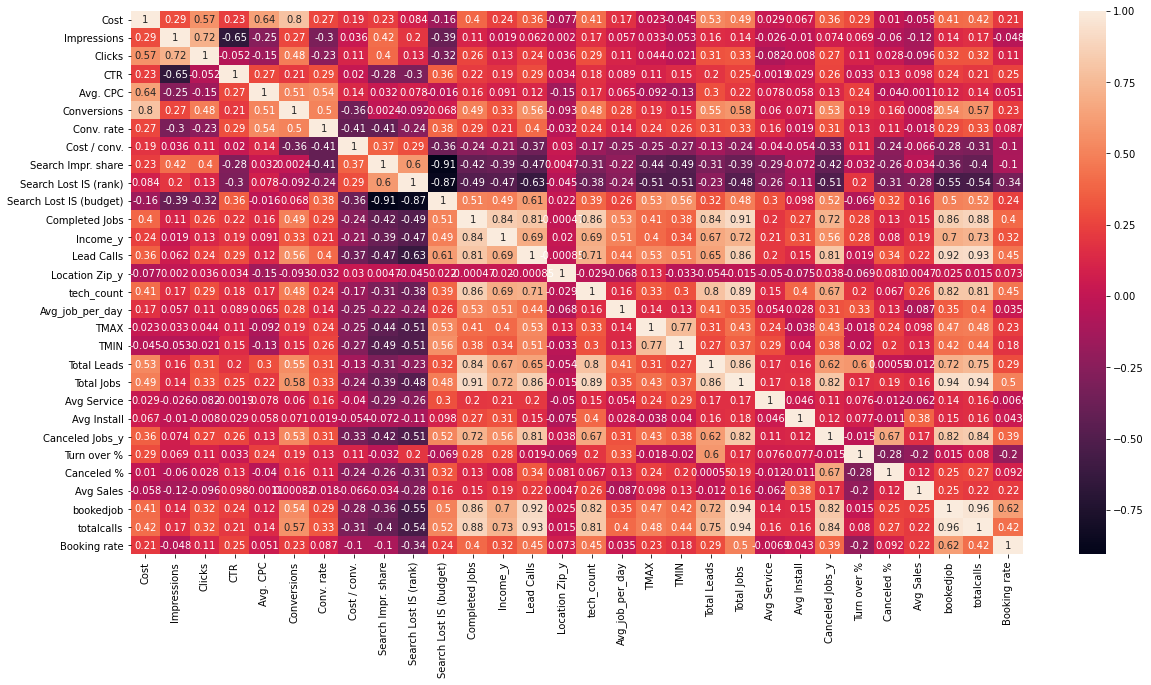

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='spearman'),annot=True)

In [31]:
df.columns

Index(['Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC', 'Conversions',
       'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       'Search Lost IS (rank)', 'Search Lost IS (budget)', 'Completed Jobs',
       'Income_y', 'Lead Calls', 'Location Zip_y', 'tech_count',
       'Avg_job_per_day', 'TMAX', 'TMIN', 'Total Leads', 'Total Jobs ',
       'Avg Service', 'Avg Install', 'Canceled Jobs_y', 'Turn over %',
       'Canceled %', 'Avg Sales', 'bookedjob', 'totalcalls', 'Booking rate'],
      dtype='object')

In [32]:
df1=df[['Completed Jobs','Total Leads','tech_count','bookedjob','Avg Install','TMAX','Income_y','Avg Sales','Location Zip_y']]

In [33]:
Mean_encoded_subject =df1.groupby(['Location Zip_y'])['Income_y'].mean().to_dict() 
  
df1['Zip_income'] = df1['Location Zip_y'].map(Mean_encoded_subject) 


df1=df1.drop(['Location Zip_y'],axis=1)
  


C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
Mean_encoded_subject


{90006: 48859.675,
 90008: 115060.87,
 90019: 51674.87,
 90022: 94156.55,
 90039: 121328.92,
 90045: 83225.34,
 90048: 68014.91,
 90049: 23933.54,
 90056: 146926.6,
 90059: 188652.92,
 90065: 95731.35,
 90066: 114742.73,
 90069: 82783.43,
 90201: 177410.42,
 90210: 63865.115,
 90220: 97789.81,
 90222: 107784.39,
 90240: 84356.17,
 90242: 52592.07,
 90245: 64231.93,
 90247: 130172.56,
 90249: 152346.75,
 90250: 32850.8,
 90262: 122574.406,
 90265: 60071.26,
 90275: 140071.41,
 90277: 279776.85,
 90303: 124675.4,
 90304: 36992.0,
 90403: 53960.72,
 90501: 92858.79,
 90504: 102857.38,
 90505: 128854.58,
 90601: 125343.60500000001,
 90603: 13836.0,
 90604: 1442.66,
 90606: 214287.195,
 90620: 128646.57666666668,
 90630: 41849.9,
 90631: 63902.24875,
 90638: 32925.41,
 90640: 35357.215,
 90650: 108596.07800000001,
 90660: 121130.75,
 90670: 21842.905,
 90680: 36504.72,
 90703: 69090.475,
 90710: 24089.0,
 90712: 208.43,
 90713: 122188.35333333333,
 90717: 124473.84,
 90742: 197808.55,
 9074

In [35]:
df1.head()

,Completed Jobs,Total Leads,tech_count,bookedjob,Avg Install,TMAX,Income_y,Avg Sales,Zip_income
0,57,10,59,49,3224.412750,65,23933.54,3617.444828,23933.540
1,77,9,40,56,965.365854,71,65232.03,1781.345385,74498.870
2,55,3,21,30,1377.666667,69,26195.32,459.248750,110329.465
3,6,2,9,11,406.250000,69,264.00,846.000000,32925.410
4,73,8,60,54,1646.943488,77,48506.16,1820.060789,83225.340


In [36]:
train=df1[0:300]
test=df1[300:]

In [37]:
train.head()

,Completed Jobs,Total Leads,tech_count,bookedjob,Avg Install,TMAX,Income_y,Avg Sales,Zip_income
0,57,10,59,49,3224.412750,65,23933.54,3617.444828,23933.540
1,77,9,40,56,965.365854,71,65232.03,1781.345385,74498.870
2,55,3,21,30,1377.666667,69,26195.32,459.248750,110329.465
3,6,2,9,11,406.250000,69,264.00,846.000000,32925.410
4,73,8,60,54,1646.943488,77,48506.16,1820.060789,83225.340


<AxesSubplot:>

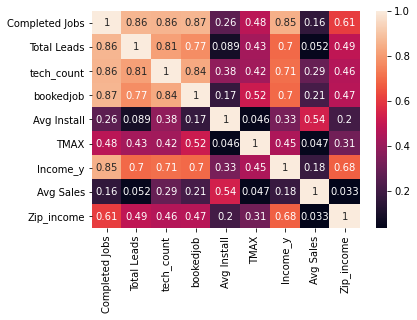

In [38]:
sns.heatmap(train.corr(method='spearman'),annot=True)

In [39]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [584]:
model= AutoFeatRegressor(verbose=1,feateng_steps=3)

In [585]:
df1

,Completed Jobs,Total Leads,tech_count,bookedjob,Avg Install,TMAX,Income_y,Avg Sales,Zip_income
0,57,10,59,49,3224.412750,65,23933.54,3617.444828,23933.540
1,77,9,40,56,965.365854,71,65232.03,1781.345385,74498.870
2,55,3,21,30,1377.666667,69,26195.32,459.248750,110329.465
3,6,2,9,11,406.250000,69,264.00,846.000000,32925.410
4,73,8,60,54,1646.943488,77,48506.16,1820.060789,83225.340
...,...,...,...,...,...,...,...,...,...
345,12,2,9,12,0.000000,70,55111.85,173.633333,96350.745
346,121,42,50,54,2110.854545,74,133042.85,793.345047,140071.410
347,123,41,64,49,2298.813953,71,88538.89,1288.510000,122574.406
348,107,42,66,43,4165.861111,67,66133.39,1018.203878,67736.960


In [586]:
fe_y=df1['Income_y']
fe_X=df1.drop(['Income_y'],axis=1)

In [587]:
fe_X.isnull().sum()

Completed Jobs    0
Total Leads       0
tech_count        0
bookedjob         0
Avg Install       1
TMAX              0
Avg Sales         0
Zip_income        0
dtype: int64

In [588]:
fe_X['Avg Install']=fe_X['Avg Install'].fillna(1712.5)

In [589]:
new_feat= model.fit_transform(fe_X,fe_y)

[AutoFeat] The 3 step feature engineering process could generate up to 38556 features.
[AutoFeat] With 350 data points this new feature matrix would use about 0.05 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 34 transformed features from 8 original features - done.
[feateng] Step 2: first combination of features


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


C:\Users\vksva\Anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\vksva\Anaconda3\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


[feateng] Generated 3281 feature combinations from 861 original feature tuples - done.
[feateng] Step 3: transformation of new features


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log


<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: divide by zero encountered in log
<string>

[feateng] Generated 10755 transformed features from 3281 original features - done.
[feateng] Generated altogether 15482 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level


C:\Users\vksva\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


[feateng] Generated a total of 7702 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 39 features after 5 feature selection runs
[featsel] 25 features after correlation filtering
[featsel] 12 features after noise filtering
[AutoFeat] Computing 11 new features.
[AutoFeat]    11/   11 new features ...done.
[AutoFeat] Final dataframe with 19 feature columns (11 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
-74420.07838119366
-1437415.760434 * 1/(TMAX + TotalLeads**2)
6495.171833 * log(sqrt(CompletedJobs)*TMAX**3)
5741.052017 * Abs(sqrt(CompletedJobs) - sqrt(tech_count))
-1833.047149 * bookedjob*exp(-sqrt(TotalLeads))
-192.457862 * Completed Jobs
-91.948688 * (-sqrt(CompletedJobs) + sqrt(TotalLeads))**3
0.496184 * TMAX*sqrt(Zip_income)
0.105012 * Abs(

In [492]:
new_feat.head()

,Completed Jobs,Total Leads,tech_count,bookedjob,Avg Install,TMAX,Avg Sales,Zip_income,AvgSales*CompletedJobs,TMAX*log(CompletedJobs),CompletedJobs*Zip_income,CompletedJobs/tech_count,CompletedJobs**3/bookedjob,TMAX*sqrt(Zip_income),TMAX**3*TotalLeads**3,Zip_income*bookedjob**3
0,57.0,10.0,59.0,49.0,3224.412750,65.0,3617.444828,23933.540,206194.355172,262.798332,1364211.780,0.966102,3779.448980,10055.804617,274625000.0,2.815757e+09
1,77.0,9.0,40.0,56.0,965.365854,71.0,1781.345385,74498.870,137163.594615,308.410185,5736412.990,1.925000,8152.375000,19379.081600,260917119.0,1.308319e+10
2,55.0,3.0,21.0,30.0,1377.666667,69.0,459.248750,110329.465,25258.681250,276.505990,6068120.575,2.619048,5545.833333,22918.956845,8869743.0,2.978896e+09
3,6.0,2.0,9.0,11.0,406.250000,69.0,846.000000,32925.410,5076.000000,123.631403,197552.460,0.666667,19.636364,12520.298599,2628072.0,4.382372e+07
4,73.0,8.0,60.0,54.0,1646.943488,77.0,1820.060789,83225.340,132864.437632,330.365377,6075449.820,1.216667,7204.018519,22213.577849,233744896.0,1.310499e+10


In [493]:
new_feat.shape

(350, 16)

In [494]:
fe_y

0       23933.54
1       65232.03
2       26195.32
3         264.00
4       48506.16
         ...    
345     55111.85
346    133042.85
347     88538.89
348     66133.39
349     67090.81
Name: Income_y, Length: 350, dtype: float64

In [495]:
independent=new_feat[0:300]
dependent=fe_y[0:300]

In [496]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent,dependent, test_size=0.2, random_state=42)

In [501]:
test_independent=new_feat[300:]
test_dependent=fe_y[300:]

In [503]:
from sklearn.ensemble import ExtraTreesRegressor

In [504]:
reg_1= ExtraTreesRegressor()


In [505]:
reg_1.fit(X_train,y_train)


ExtraTreesRegressor()

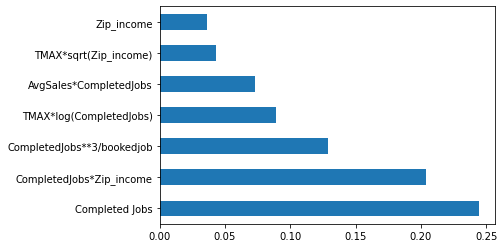

In [506]:

feat_importances = pd.Series(reg_1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [507]:
new_feat.columns

Index(['Completed Jobs', 'Total Leads', 'tech_count', 'bookedjob',
       'Avg Install', 'TMAX', 'Avg Sales', 'Zip_income',
       'AvgSales*CompletedJobs', 'TMAX*log(CompletedJobs)',
       'CompletedJobs*Zip_income', 'CompletedJobs/tech_count',
       'CompletedJobs**3/bookedjob', 'TMAX*sqrt(Zip_income)',
       'TMAX**3*TotalLeads**3', 'Zip_income*bookedjob**3'],
      dtype='object')

In [563]:
filt=new_feat[['Completed Jobs',
       'AvgSales*CompletedJobs', 'TMAX*log(CompletedJobs)',
        'CompletedJobs/tech_count',
        'TMAX*sqrt(Zip_income)',
       ]]

In [564]:
# filt=new_feat[['Completed Jobs',
       #'AvgSales*CompletedJobs', 'CompletedJobs*Zip_income',
       #'TMAX*log(CompletedJobs)', 'CompletedJobs**3/bookedjob','TMAX*sqrt(Zip_income)']]

<AxesSubplot:>

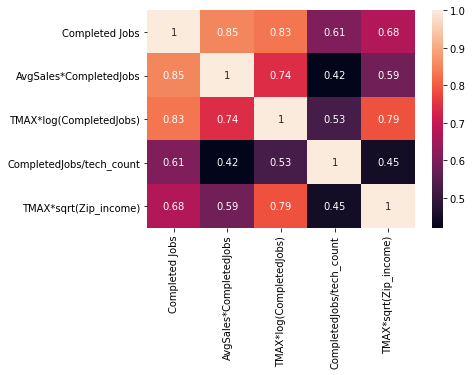

In [565]:
sns.heatmap(filt.corr(method='spearman'),annot=True)

In [566]:
train=filt[0:300]
test=filt[300:]

In [567]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,dependent, test_size=0.2, random_state=42)

In [317]:
from sklearn.ensemble import RandomForestRegressor


In [318]:
# intializing the randomeforest regressor

random_forest_reg=RandomForestRegressor()

In [319]:
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [320]:
random_forest_reg.score(X_train,y_train)

0.9600863410017217

In [321]:
random_forest_reg.score(X_test,y_test)

0.7456864542125892

In [322]:
random_forest_reg.score(test,test_dependent)

0.5792624388501578

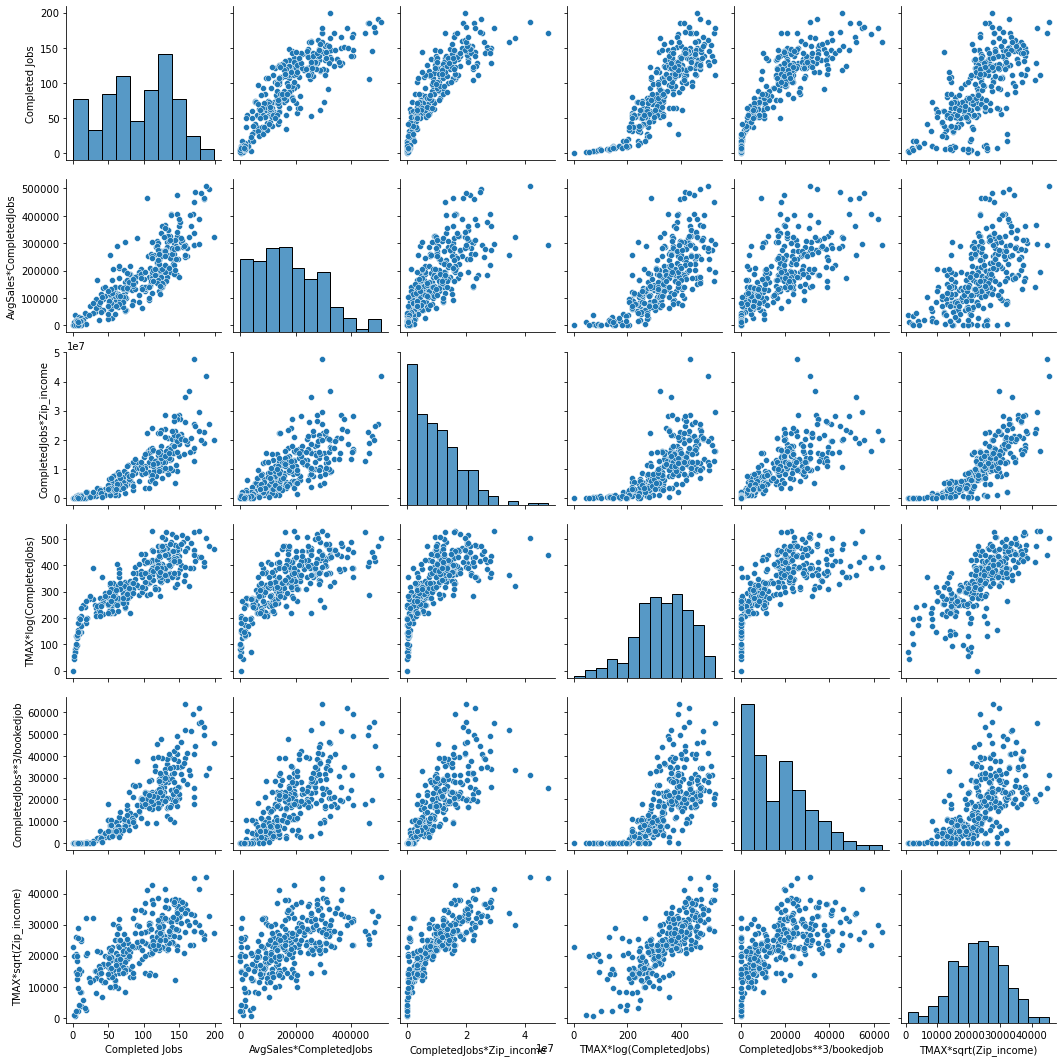

In [802]:
sns.pairplot(train)